In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

#데이터 읽기
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#Tensor 및 Flow 정의
# 28X28개의 데이터가 입력됨
X = tf.placeholder(tf.float32, [None, 784])

# 10개의 결과가 나감(ONEHOT 방식)
Y = tf.placeholder(tf.float32, [None, 10]) 

#입력층 설계
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1)

#은닉층 설계
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.random_normal([256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

#출력층 설계
W3=tf.Variable(tf.random_normal([256,10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([10], stddev=0.01))
model = tf.matmul(L2, W3) + b3

#코스트함수 설정(소프트맥스 앤트로피)
S = tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y)
cost = tf.reduce_mean(S)

# 옵티마이저는 아담옵티마이저 사용
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()

W0903 09:41:17.325280 17476 deprecation.py:323] From <ipython-input-1-83126fd6e4f9>:8: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0903 09:41:17.325280 17476 deprecation.py:323] From C:\Users\noteland\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0903 09:41:17.325280 17476 deprecation.py:323] From C:\Users\noteland\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future ver

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0903 09:41:18.535232 17476 deprecation.py:323] From C:\Users\noteland\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0903 09:41:18.535232 17476 deprecation.py:323] From C:\Users\noteland\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz


W0903 09:41:19.227970 17476 deprecation.py:323] From C:\Users\noteland\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#실행부분
sess = tf.Session()  
sess.run(init)
batch_size = 100
epoch_cnt = 10
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(epoch_cnt):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y:batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))

print('optimizer complete!')
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('Accuracy :', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))


labels = sess.run(model, feed_dict = { X: mnist.test.images, Y:mnist.test.labels })


Epoch: 0001 Avg. cost =  0.413
Epoch: 0002 Avg. cost =  0.152
Epoch: 0003 Avg. cost =  0.102
Epoch: 0004 Avg. cost =  0.073
Epoch: 0005 Avg. cost =  0.056
Epoch: 0006 Avg. cost =  0.041
Epoch: 0007 Avg. cost =  0.034
Epoch: 0008 Avg. cost =  0.031
Epoch: 0009 Avg. cost =  0.021
Epoch: 0010 Avg. cost =  0.017
optimizer complete!
Accuracy : 0.9808


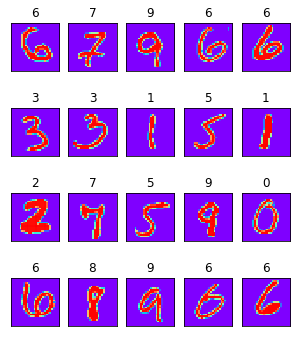

In [8]:
fig = plt.figure(figsize=(5,6))
for i in range(20):
    r = random.randint(1, mnist.test.num_examples - 1)
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[r]))
    subplot.imshow(mnist.test.images[r].reshape((28, 28)), cmap=plt.cm.rainbow)

plt.show()

In [4]:
import pytorch

ModuleNotFoundError: No module named 'pytorch'